1.  Análisis de metadatos dicom y visualización

1.1. Extraer y analizar los metadatos DICOM

In [37]:
import pydicom, matplotlib.pyplot as plt, pandas as pd

In [38]:
#dcm_data_prueba = pydicom.dcmread(r'C:\Users\Isabela\Documents\2025-1\Imagenes\DatosEntrega1\Patient11\201\1.3.46.670589.11.45555.5.0.8800.2023062816190336887.dcm')
dcm_data_prueba = pydicom.dcmread(r'E:\ACTUAL\ACTUAL\Procesamiento_Dig_Imágenes\Patient11\Patient11\201\1.3.46.670589.11.45555.5.0.8800.2023062816190339893.dcm')
#dcm_data_prueba

In [39]:
nombre_paciente = dcm_data_prueba.PatientName                           ;   print("Patient name: "+ str(nombre_paciente))
modality= dcm_data_prueba.Modality                                      ;   print("Modality: "+ str(modality))
SliceThickness= dcm_data_prueba.SliceThickness                          ;   print("Slice Thickness: "+ str(SliceThickness))
BodyPartExamined= dcm_data_prueba.BodyPartExamined                      ;   print("Body Part Examined: "+ str(BodyPartExamined))
MRAcquisitionType= dcm_data_prueba.MRAcquisitionType                    ;   print("MR Acquisition Type: "+ str(MRAcquisitionType))
PhotometricInterpretation= dcm_data_prueba.PhotometricInterpretation    ;   print("Photometric Interpretation: "+ str(PhotometricInterpretation))
RepetitionTime= dcm_data_prueba.RepetitionTime                          ;   print("Repetition Time (TR): "+ str(RepetitionTime))
EchoTime= dcm_data_prueba.EchoTime                                      ;   print("EchoTime (ET): "+ str(EchoTime))
SpacingBetweenSlices= dcm_data_prueba.SpacingBetweenSlices              ;   print("SpacingBetweenSlices: "+ str( SpacingBetweenSlices))
Manufacturer= dcm_data_prueba.Manufacturer                              ;   print("Manufacturer: "+ str( Manufacturer))
MagneticFieldStrength = dcm_data_prueba.MagneticFieldStrength           ;   print("Magnetic Field Strength : "+ str( MagneticFieldStrength ))

#ScannerModel = dcm_data_prueba.ScannerModel                            ;   print("Scanner Model : "+ str( ScannerModel ))
#dcm_data_prueba. dir('Scanner')                #No existe el atributo

Patient name: TEST
Modality: MR
Slice Thickness: 4
Body Part Examined: LSPINE
MR Acquisition Type: 
Photometric Interpretation: MONOCHROME2
Repetition Time (TR): -1
EchoTime (ET): -1
SpacingBetweenSlices: 5
Manufacturer: Philips
Magnetic Field Strength : None


In [40]:
lista=["PatientName","Modality","SliceThickness","BodyPartExamined","MRAcquisitionType","PhotometricInterpretation",
       "RepetitionTime","EchoTime","SpacingBetweenSlices","Manufacturer","MagneticFieldStrength"]

nombre=[];      num_tag=[];   tipo=[];      valor=[]
for i in lista:
    nombre.append(str(dcm_data_prueba[i].name))
    num_tag.append(str(dcm_data_prueba[i].tag))
    tipo.append(str(dcm_data_prueba[i].VR))
    valor.append(str(dcm_data_prueba[i].value))

In [41]:
data={"Name":nombre,"Tag":num_tag,"Type":tipo,"Value":valor}
DataF=pd.DataFrame(data)
DataF

,Name,Tag,Type,Value
0,Patient's Name,"(0010, 0010)",PN,TEST
1,Modality,"(0008, 0060)",CS,MR
2,Slice Thickness,"(0018, 0050)",DS,4
3,Body Part Examined,"(0018, 0015)",CS,LSPINE
4,MR Acquisition Type,"(0018, 0023)",CS,
5,Photometric Interpretation,"(0028, 0004)",CS,MONOCHROME2
6,Repetition Time,"(0018, 0080)",DS,-1
7,Echo Time,"(0018, 0081)",DS,-1
8,Spacing Between Slices,"(0018, 0088)",DS,5
9,Manufacturer,"(0008, 0070)",LO,Philips


-Patient's name: hace referencia al nombre completo del paciente, pertenece al grupo 0010 que corresponde al modulo de información del paciente, indica a quién pertenece la imagen, acepta PN que indica person name que es una cadena de caracteres codificada con 5 componentes que para humanos son apellido complejo, nombre complejo, segundo nombre, prefijo y sufijo, puede contener como máximo 64 caracteres.

-Modality: hace referencia al tipo de proceso, dispositivo o método que originalmente adquirió o produjo los datos empleados en la creación de la serie, pertenece al grupo 0008, indica la modalidad de adquisición de la imagen, acepta CS que indica code string que es una cadena de caracteres que acepta términos controlados (por ejemplo ANN, AR, Bi, entre otros) y tiene un máximo de 16 bytes.

-Slice Thickness: hace referencia al espesor del corte de la imagen en milímetros, pertenece al grupo 0018 que está relacionado con información correspondiente al proceso de obtención de la imagen, acepta DS que indica decimal string e incluye números del 0 al 9, la letra "E", "e" y los símbolos "+" y "-", con un máximo de 16 bytes.

-Body Part Examined: es una descripción de la parte del cuerpo examinada en la imagen, pertenece al grupo 0018, permite identificar la parte del cuerpo que está contenida en la imagen, acepta CS (por ejemplo LSPINE, HEADNECK, FEMORALA, entre otras) con un máximo de 16 bytes.

-MR Acquisition Type: puede representar dos cosas dependiendo del modulo de atributos al que pertenezca. Si pertenece al módulo de atributos de imagen MR es la identificación del esquema de codificación de datos (2D o 3D) y si pertenece al módulo de atributos de secuencia de pulso MR hace referencia a la identificación del esquema de codificación de datos espaciales (1D, 2D o 3D). Pertenece al grupo 0018, acepta CS (por ejemplo 2D o 3D) con un máximo de 16 bytes.

-Photometric Interpretation: especifica la interpretación de la información en los pixeles, pertenece al grupo 0028 que principalmente contiene información sobre los pixeles de la imagen, permite determinar en qué sentido se da la variación de la escala de los pixeles, por ejemplo, monochrome 1 varía de claros a oscuros mientras que monochrome 2 varía de oscuros a claros. acepta CS (por ejemplo monochrome 1, monochrome 2) con un máximo de 16 bytes.

-Repetition Time: es el periodo de tiempo en milisegundos que transcurre entre el comienzo de una secuencia de pulsos y el comienzo de la siguiente, indica el tiempo de repetición de los pulsos de radiofrecuencia. Pertenece al grupo 0018, acepta DS (decimal string) con un máximo de 16 bytes..

-Echo Time: es el tiempo en milisegundos entre la mitad del pulso de excitación y el pico del eco producido. Pertenece al grupo 0018 e indica el tiempo de respuesta de la excitación que se va a capturar (tiempo de relajación de los protones del cuerpo), acepta DS (decimal string) con un máximo de 16 bytes.

-Spacing Between Slices: representa la separación en milímetros entre cortes adyacentes, esta distancia se mide desde el centro de cada uno. Pertenece al grupo 0018 y acepta DS (decimal string) con un máximo de 16 bytes.

-Manufacturer: indica el fabricante del equipo. Pertenece al grupo 0008 y acepta valores tipo LO, es decir, long string que es una cadena de máximo 64 caracteres.

-Magnetic Field Strength: representa la intensidad del campo generado por el imán medido en teslas. Pertenece al grupo 0018 y acepta DS (decimal string) con un máximo de 16 bytes.


**OBSERVACIÓN**

Los valores de -1 para el Tiempo de Repetición (TR) y el Tiempo de Eco (TE) en el conjunto de datos MR DICOM **no tienen sentido** en la definición física y de parámetros de adquisición o en el estándar DICOM de estos parámetros, por lo que se asume este valor como no disponible.

**Referencias**

[1]	Nema.org. [En línea]. Disponible en: https://dicom.nema.org/medical/dicom/current/output/html/part03.html#sect_C.38.1.3.2. [Consultado: 23-abr-2025].

[2]	L. L. C. Innolitics, “DICOM standard browser”, Innolitics.com. [En línea]. Disponible en: https://dicom.innolitics.com/ciods/ultrasound-image/general-series/00180015. [Consultado: 23-abr-2025].


1.2. Interpretación técnica 

Parmetros técnicos:

-Slice Thickness

-Spacing Between Slices

-MR Acquisition Type

-Body Part Examined

-Repetition Time

-Echo Time

-Magnetic Field Strength

El parámetro Magnetic Field Strength, es fundamental en la adquisición de la imagen porque en el campo del imán es que se basa el funcionamiento del resonador magnético, este campo obliga a los protones a cambiar su alineación natural [3] y cuanto más potente sea (más teslas tenga) mejor será la calidad de la imagen, teniendo en cuenta que actualmente existen valores máximos de teslas para uso clínico. A esto van muy arraigados los parámetros Repetition Time y Echo Time, pues el tiempo de repetición indica la frecuencia de pulsos de radiofrecuencia que son enviados al paciente, estimulando los protones haciéndolos girar fuera del equilibrio [3] y luego viene el tiempo de eco, en el que se apaga el campo y se captura la energía liberada por los protones en su proceso de relajación en el cual vuelven a su alineación inicial [3].

El parámetro MR Acquisition Type da cuenta de cuántos planos son potenciados en la imagen adquirida, en 2D solo se potencia un plano mientras que en 3D se potencian los tres planos y por tanto una resonancia magnética en 3D implica mayor cantidad de cortes y resolución, aumentando el tiempo de la toma, mientras que en 2D se toman secuencias de cortes del cuerpo en planos específicos dependiendo de la parte que vaya a ser examinada y es aquí donde el parámetro Body Part Examined cobra relevancia, pues mediente este se determina si el corte será axial, coronal o sagital, también dependiendo de la parte examinada será el tiempo que tarden los protones en realinearse con el campo magnético y liberar su energía pues estas propiedades magnéticas dependen del tipo de tejido [3].

El parámetro Spacing Between Slices puede dar cuenta del detalle de la imagen dado que entre menor sea el espacio entre los cortes de una secuencia se tiene mayor continuidad en la imagen y una mayor calidad [4] y está muy relacionado con Slice Thickness que da cuenta del grosor total de la secuencia de cortes, ya que, al incrementar el espacio entre cada corte se puede disminuir la cantidad de estos que se requieren para cubrir el mismo volumen lo cual representa beneficios en términos de eficiencia y reducción del tiempo del examen [4]. En la adquisición de la imagen se debe encontrar un equilibrio entre el espaciado de cortes necesario para disminuir los artefactos de interferencias cruzadas para tener una mayor calidad de la imagen y el tiempo de adquisición de esta [4].  



[3]	“Imagen por Resonancia Magnética (IRM)”, National Institute of Biomedical Imaging and Bioengineering. [En línea]. Disponible en: https://www.nibib.nih.gov/espanol/temas-cientificos/imagen-por-resonancia-magn%C3%A9tica-irm. [Consultado: 23-abr-2025].

[4]	“MRI distance factor / Slice gap”, mrimaster, 06-may-2024. [En línea]. Disponible en: https://mrimaster.com/mri-distance-factor-slice-gap/. [Consultado: 23-abr-2025].


1.3. Visualización

In [42]:
dcm_data_prueba.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(480, 480), dtype=uint16)

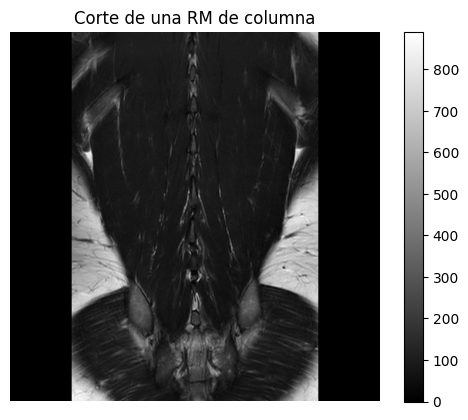

In [43]:
im = dcm_data_prueba.pixel_array
plt.imshow(im, cmap= 'gray' )
plt.axis( 'off' )
plt.title( 'Corte de una RM de columna' )
plt.colorbar()
plt.show()

2. Comparación multimodal de imágenes

    2.1. Identificación y comparación
    
    Para realizar la comparación se realizó una funcion que permite seleccionar en cada caso qué archivo (corte) graficar en el subplot.


---SELECCION Modalidad 1 ---
Se encontraron 29 archivos .dcm encontrados en E:\ACTUAL\ACTUAL\Procesamiento_Dig_Imágenes\Punto_2_drive-download-20250422T020410Z-001\Modalidad1\Modalidad1\201:
Seleccionado: 1.3.46.670589.11.45555.5.0.8860.2024062407360692067.dcm (#20)

---SELECCION Modalidad 2 ---
Se encontraron 1 archivos .dcm encontrados en E:\ACTUAL\ACTUAL\Procesamiento_Dig_Imágenes\Punto_2_drive-download-20250422T020410Z-001\Modalidad2\Modalidad2\ScalarVolume_13:
Seleccionado: IMG0001.dcm (#0)

---SELECCION Modalidad 3 ---
Se encontraron 93 archivos .dcm encontrados en E:\ACTUAL\ACTUAL\Procesamiento_Dig_Imágenes\Punto_2_drive-download-20250422T020410Z-001\Modalidad3\Modalidad3\ScalarVolume_27:
Seleccionado: IMG0051.dcm (#50)


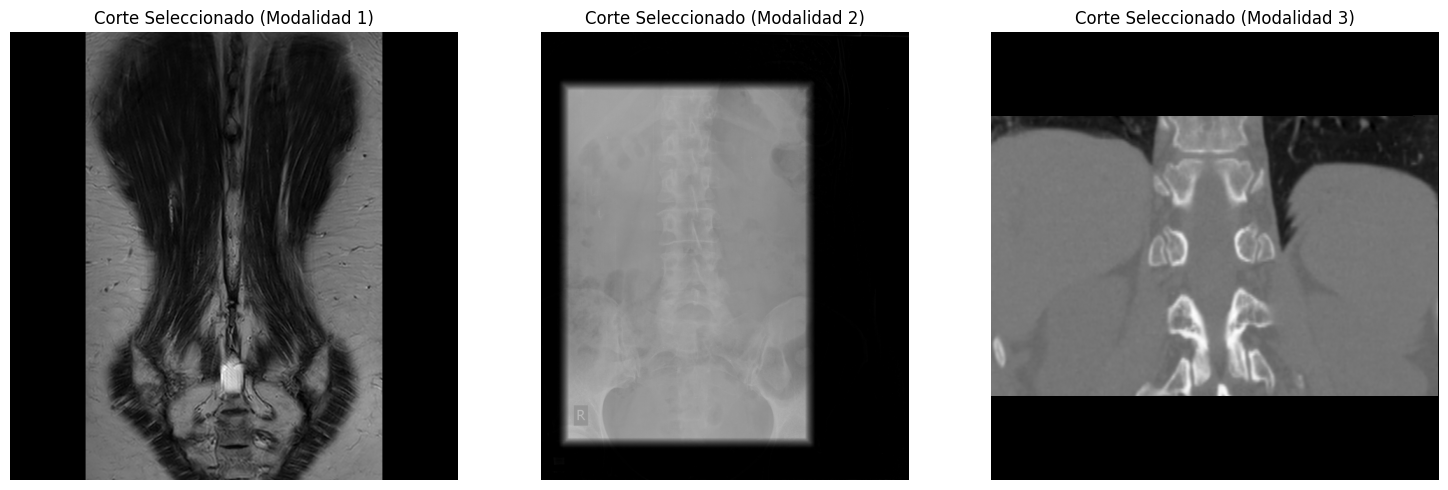

In [44]:
import sys  # Para salir del script si no se seleccionó un archivo
# Ruta base del directorio con las carpetas de modalidades 
base_dir = r'E:\ACTUAL\ACTUAL\Procesamiento_Dig_Imágenes\Punto_2_drive-download-20250422T020410Z-001'

# Definir las rutas a las carpetas de las modalidades
folder_path1 = os.path.join(base_dir, r'Modalidad1\Modalidad1\201')
folder_path2 = os.path.join(base_dir, r'Modalidad2\Modalidad2\ScalarVolume_13')
folder_path3 = os.path.join(base_dir, r'Modalidad3\Modalidad3\ScalarVolume_27')

# Lista para almacenar las rutas de los archivos DICOM seleccionados
selected_files = []
modalities = {'Modalidad 1': folder_path1,    'Modalidad 2': folder_path2,    'Modalidad 3': folder_path3}

# --- Función para listar archivos DICOM en una carpeta y obtener una selección del usuario ---
def select_dicom_slice(modality_name, folder_path):
    print(f"\n---SELECCION {modality_name} ---")

    if not os.path.isdir(folder_path):# Verificar si la carpeta existe
        print(f"Error: La carpeta para {modality_name} no fue encontrada en: {folder_path}")
        return None # Retornar None si la carpeta no existe

    # Listar todos los archivos en la carpeta que terminan con .dcm
    files_in_folder = [f for f in os.listdir(folder_path) if f.lower().endswith('.dcm')]

    if not files_in_folder:
        print(f"No se encontraron archivos .dcm en la carpeta: {folder_path}")
        return None # Retornar None si no se encuentran archivos DICOM
   
    files_in_folder.sort() # Ordenar archivos 

    print(f"Se encontraron {len(files_in_folder)} archivos .dcm encontrados en {folder_path}:")

    # Obtener la entrada del usuario para la selección
    while True:
        try:
            selection = input(f"Introduce el número del corte que deseas graficar para {modality_name} (0-{len(files_in_folder)-1}): ")
            selection_index = int(selection)
            if 0 <= selection_index < len(files_in_folder):
                selected_file_name = files_in_folder[selection_index]
                full_path = os.path.join(folder_path, selected_file_name)
                print(f"Seleccionado: {selected_file_name} (#{selection_index})")
                return full_path # Retornar la ruta completa del archivo seleccionado
            else:
                print("Número inválido. Por favor, introduce un número dentro del rango.")
        except ValueError:
            print("Entrada inválida. Por favor, introduce un número.")
        except Exception as e:
            print(f"Ocurrió un error durante la selección: {e}")
            return None

# --- Obtener la selección del usuario para cada modalidad ---
for name, path in modalities.items():
    selected_file = select_dicom_slice(name, path)
    if selected_file:
        selected_files.append(selected_file)
    else:
        # Si la selección falló para alguna modalidad, salir del script
        print("No se pudo seleccionar un archivo para una de las modalidades. Saliendo.")
        sys.exit() # Salir del script si no se seleccionó un archivo

# --- Graficar las imágenes seleccionadas ---
if len(selected_files) == 3:
    try:
        modalidad1_dcm = pydicom.dcmread(selected_files[0])
        modalidad2_dcm = pydicom.dcmread(selected_files[1])
        modalidad3_dcm = pydicom.dcmread(selected_files[2])

        fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

        # Graficar la primera imagen seleccionada
        axes[0].imshow(modalidad1_dcm.pixel_array, cmap='gray')
        axes[0].set_title('Corte Seleccionado (Modalidad 1)')
        axes[0].axis('off')

        # Graficar la segunda imagen seleccionada
        axes[1].imshow(modalidad2_dcm.pixel_array, cmap='gray')
        axes[1].set_title('Corte Seleccionado (Modalidad 2)')
        axes[1].axis('off')

        # Graficar la tercera imagen seleccionada
        axes[2].imshow(modalidad3_dcm.pixel_array, cmap='gray')
        axes[2].set_title('Corte Seleccionado (Modalidad 3)')
        axes[2].axis('off')

        
        plt.tight_layout() ; plt.show()     # Ajustar el diseño y graficar

    except FileNotFoundError as e:
        print(f"Error al cargar el archivo seleccionado: {e}")
        print("Por favor, asegúrate de que las rutas de los archivos seleccionados son correctas.")
    except Exception as e:
        print(f"Ocurrió un error durante la graficación: {e}")
        print("Por favor, verifica los archivos DICOM seleccionados y tu entorno.")
else:
    print("Error: No se seleccionaron 3 archivos correctamente para graficar.")


Se observa que las tres modalidades corresponden a imágenes médicas enfocadas en la zona lumbar y la pelvis desde una vista coronal y con FOV distintos en cada caso. 

- **Modalidad 1 (MR)**: Es una resonancia magnética que proporciona una vista detallada de los tejidos blandos, permitiendo una mejor visualización de músculos, discos intervertebrales y estructuras internas.
- **Modalidad 2 (RX)**: Es una radiografía que ofrece una vista general de las estructuras óseas. En este caso es una imagen con poco contraste y un alto nivel de ruido, puede ser por los parámetros con que fue adquirida (Kilovoltaje), que con preprocesado podría mejorar la identificación de estructuras según el interés con que fue tomada.
- **Modalidad 3 (CT)**: Es una tomografía computarizada que proporciona una vista seccional con alto contraste de los huesos.

Debido a sus principios físicos y funcionamiento, las imagenes 1 y 3 poseen contrastes entre tejidos/estructuras muy distintos, siendo la MR característica de las distintas capas de tejidos blandos, diferenciables por el decaimiento de los espines y los valores de parámetros TR y TE, mientras que la CT permite visualizar de mejor forma tejidos óseos debido al nivel de absorción de los rayos X, por lo que la cantidad de radiación emitida es el parámetro que determina el contraste en este caso. 

La imagen 2, al ser una rediografía, solo cuenta con 1 corte (1 único archivo .dcm).

Para analizar los valores numéricos de las imágenes, se toman los archivos seleccionados y se extraen las características: 

In [45]:

# Cargar los archivos DICOM seleccionados
modalidad1_dcm = pydicom.dcmread(selected_files[0])
modalidad2_dcm = pydicom.dcmread(selected_files[1])
modalidad3_dcm = pydicom.dcmread(selected_files[2])

# Lista de datasets cargados
datasets = [modalidad1_dcm, modalidad2_dcm, modalidad3_dcm]
dataset_names = ['Modalidad 1 (MR)', 'Modalidad 2 (RX)', 'Modalidad 3 (CT)']

# Iterar sobre cada dataset y extraer las características
for i, dataset in enumerate(datasets):
    print(f"\nCaracterísticas para {dataset_names[i]}:")
    try:
        # Forma de la imagen (alto, ancho)
        print(f"  Shape de la imagen (alto, ancho): {dataset.pixel_array.shape}")
    except AttributeError:
        print("  Shape de la imagen: No disponible (pixel_array no encontrado)")

    try:
        # Espaciado de píxeles [fila, columna]
        print(f"  Pixel Spacing [fila, columna] (mm): {dataset.PixelSpacing}")
    except AttributeError:
        print("  Pixel Spacing: No disponible")

    try:
        # Grosor del corte (mm)
        print(f"  Slice Thickness (mm): {dataset.SliceThickness}")
    except AttributeError:
        print("  Slice Thickness: No disponible")

    try:
        # Espaciado entre cortes (mm) - puede no estar siempre presente
        # Nota: SpacingBetweenSlices es diferente de SliceThickness
        print(f"  Spacing Between Slices (mm): {dataset.SpacingBetweenSlices}")
    except AttributeError:
        print("  Spacing Between Slices: No disponible")

    try:
        # Bits asignados por píxel
        print(f"  Bits Allocated: {dataset.BitsAllocated}")
    except AttributeError:
        print("  Bits Allocated: No disponible")

    try:
        # Espaciado de píxeles [fila, columna] en mm
        pixel_spacing = dataset.PixelSpacing
        print(f"  Pixel Spacing [fila, columna] (mm): {pixel_spacing}")
    except AttributeError:
        pixel_spacing = None
        print("  Pixel Spacing: No disponible")
    
    try:
        # Grosor del corte (mm)
        slice_thickness = dataset.SliceThickness
        print(f"  Slice Thickness (mm): {slice_thickness}")
    except AttributeError:
        slice_thickness = None
        print("  Slice Thickness: No disponible")

    if pixel_spacing is not None and slice_thickness is not None:
        voxel_dimensions = [float(pixel_spacing[0]), float(pixel_spacing[1]), float(slice_thickness)]
        print(f"  Dimensiones del Vóxel (mm): {voxel_dimensions}")
    else:
        print("  Dimensiones del Vóxel: No disponibles (requiere Pixel Spacing y Slice Thickness)")






Características para Modalidad 1 (MR):
  Shape de la imagen (alto, ancho): (640, 640)
  Pixel Spacing [fila, columna] (mm): [0.4716981, 0.4716981]
  Slice Thickness (mm): 4
  Spacing Between Slices (mm): 4
  Bits Allocated: 16
  Pixel Spacing [fila, columna] (mm): [0.4716981, 0.4716981]
  Slice Thickness (mm): 4
  Dimensiones del Vóxel (mm): [0.4716981, 0.4716981, 4.0]

Características para Modalidad 2 (RX):
  Shape de la imagen (alto, ancho): (2828, 2320)
  Pixel Spacing: No disponible
  Slice Thickness (mm): 1
  Spacing Between Slices: No disponible
  Bits Allocated: 16
  Pixel Spacing: No disponible
  Slice Thickness (mm): 1
  Dimensiones del Vóxel: No disponibles (requiere Pixel Spacing y Slice Thickness)

Características para Modalidad 3 (CT):
  Shape de la imagen (alto, ancho): (512, 512)
  Pixel Spacing [fila, columna] (mm): [.399608615, .399608615]
  Slice Thickness (mm): 1
  Spacing Between Slices: No disponible
  Bits Allocated: 16
  Pixel Spacing [fila, columna] (mm): [.399

De las características extraídas de cada modalidad se pueden realizar varias observaciones:
- Aunque la imagen de RX parece ser desde la inspección visual la de menor calidad, esta cuenta con la mayor resolución (2828*2320), por lo cuál es la que cuenta con mayor información en el espacio bidimensional, además, por ser 2D carece de dimensiones de vóxel (3D).
- La MR tiene un mayor grosor de corte que la CT, por lo que esta última proporciona una mejor resolución espacial en este sentido, además los FOV de ambas imágenes son diferentes, por lo que la MR, al abarcar mayor área del cuerpo del sujeto, necesita de más pixeles (640x640 de la MR vs 512*512 de la CT).
- Se encontraron 29 archivos de RM, 1 de RX y 93 de CT, por lo que esta última genera mejor resolución espacial al tener mayor número de cortes.
- Las dimensiones de vóxel detectadas no son isotrópicas, esto significa que la resolución espacial varía dependiendo del eje considerado, debido a la forma de adquisición (en la MR es probable que no sea una imagen volumétrica).